In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


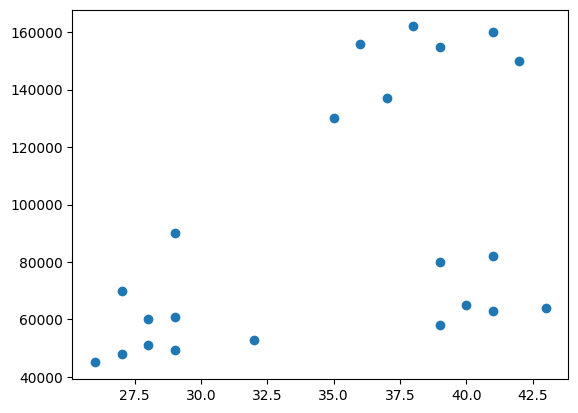

In [5]:
plt.scatter(df.Age,df['Income($)'])

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
# return 2 columns as a list of columns in the df
# print(df[['Age','Income($)']])
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted

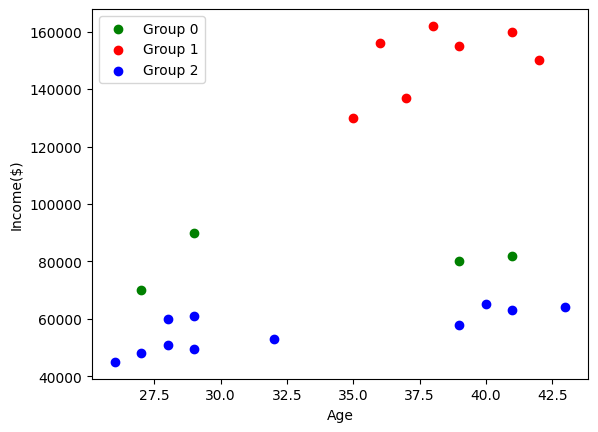

In [20]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label='Group 0')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label='Group 1')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue', label='Group 2')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(loc = 'upper left')
plt.show()

In [7]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

MinMaxScaler()


In [27]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [32]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster'] = y_predicted

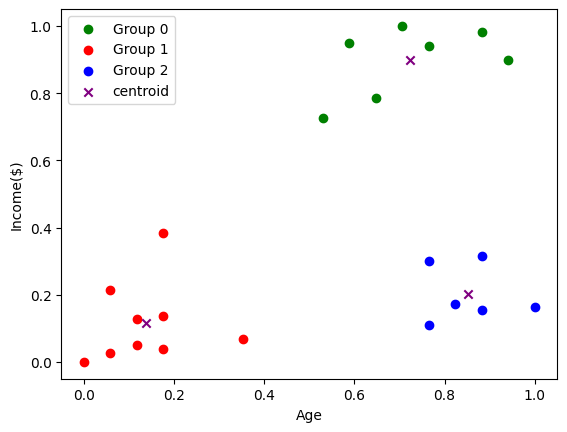

In [36]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label='Group 0')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label='Group 1')
plt.scatter(df3.Age, df3['Income($)'], color = 'blue', label='Group 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='x', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(loc = 'upper left')
plt.show()

In [34]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

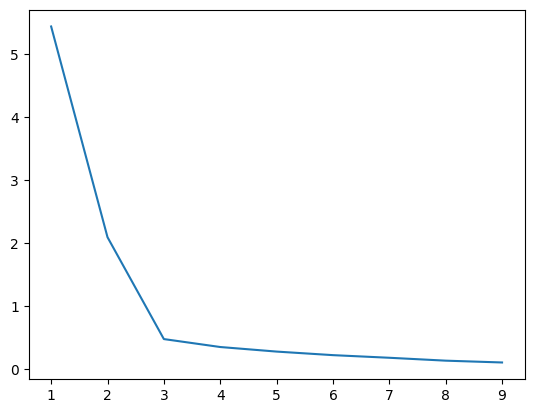

In [40]:
sse = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

plt.plot(range(1,10),sse)